# Allstate Claims Severity

Kaggle challenge

# 1)- Importing key libraries


In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# for modeling

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Regression evaluation
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score

#Model helper
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [6]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib,scipy,sklearn

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.16299 SP0
pandas 0.23.4
numpy 1.16.2
seaborn 0.9.0
matplotlib 2.1.0
scipy 1.1.0
sklearn 0.20.3
Wed Aug 28 17:17:31 2019 W. Europe Daylight Time

# 2)- Loading data

In [7]:
df_insurance=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_submit=pd.read_csv('sample_submission.csv')

In [8]:
df_insurance.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:
df_insurance.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
188317,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [10]:
df_insurance.shape

(188318, 132)

In [11]:
df_insurance.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [12]:
df_test.shape

(125546, 131)

In [13]:
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In test set, we do not have our dependant feature i.e loss

### 2a)- Feature Description

In [14]:
df_insurance.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### 2b)drop id feature

In [15]:
df_insurance.drop('id',axis=1, inplace=True)

In [16]:
df_insurance.shape

(188318, 131)

### 2c)- Data type

In [17]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df_insurance)
table_dtype

,Data Type
loss,float64
cont1,float64
cont2,float64
cont3,float64
cont4,float64
cont5,float64
cont6,float64
cont14,float64
cont8,float64
cont9,float64


### 2d)-Skewness of the distribution

In [18]:
print(df_insurance.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


# 3)- Model preparing

In [19]:
# using already saved data

df_insurance=pd.read_pickle('train.pkl')
df_insurance.shape

(188318, 132)

In [20]:
df_insurance.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [21]:
#drop id variable from current data
df_insurance.drop('id',axis=1, inplace=True)
df_insurance.shape

(188318, 131)

### 3.1)- splitting x and y variables

In [22]:
Y = df_insurance['loss'].values
X = df_insurance.drop('loss', axis=1)
print(Y.shape)
print(X.shape)

(188318,)
(188318, 130)


### 3.2)-Split the data into train-test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2019)

# 4)- Linear Models

- Linear Regression
- Ridge Regression
- LASSO Regression
- Elastic Net Regression

### 4.1)- Linear Regression

OLS

In [24]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [25]:
y_pred = model_lr.predict(X_test)

In [26]:
y_pred[:5]

array([4941.66896541, 7162.75235243, 7016.71094822, 6311.75695133,
       5442.28259355])

In [27]:
y_test[:5]

array([2129.69, 8289.68, 4606.95, 4103.9 , 2958.38])

In [28]:
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred)**0.5
r2_lr = r2_score(y_test, y_pred)

In [29]:
print('MSE    : %0.4f ' % mse_lr)
print('MAE    : %0.4f ' % mae_lr)
print('RMSE   : %0.4f ' % rmse_lr)
print('R2     : %0.4f ' % r2_lr)

MSE    : 4540104.0427 
MAE    : 1328.1657 
RMSE   : 2130.7520 
R2     : 0.4720 


### 4.2)- Ridge Regression

In [30]:
alpha=1.0 
model_ridge = Ridge(alpha=alpha,random_state=2019)
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)

In [31]:
pred_ridge[:5]

array([4938.88925098, 7160.09773944, 7019.79103491, 6311.04245425,
       5440.02496168])

In [32]:
y_test[:5]

array([2129.69, 8289.68, 4606.95, 4103.9 , 2958.38])

In [33]:
mse_ridge = mean_squared_error(y_test, pred_ridge)
mae_ridge = mean_absolute_error(y_test, pred_ridge)
rmse_ridge = mean_squared_error(y_test, pred_ridge)**0.5
r2_ridge = r2_score(y_test, pred_ridge)

In [34]:
print('MSE    : %0.4f ' % mse_ridge)
print('MAE    : %0.4f ' % mae_ridge)
print('RMSE   : %0.4f ' % rmse_ridge)
print('R2     : %0.4f ' % r2_ridge)

MSE    : 4539549.4635 
MAE    : 1328.0566 
RMSE   : 2130.6218 
R2     : 0.4721 


### 4.3)-RidgeCV

In [35]:
model_RidgeCV = RidgeCV()
model_RidgeCV.fit(X_train, y_train)
pred_RidgeCV = model_RidgeCV.predict(X_test)

In [36]:
pred_RidgeCV[:5]

array([4939.55646115, 7160.89526624, 7029.47398137, 6313.42932278,
       5443.98996453])

In [37]:
y_test[:5]

array([2129.69, 8289.68, 4606.95, 4103.9 , 2958.38])

In [38]:
mse_ridgeCV = mean_squared_error(y_test, pred_RidgeCV)
mae_ridgeCV = mean_absolute_error(y_test, pred_RidgeCV)
rmse_ridgeCV = mean_squared_error(y_test, pred_RidgeCV)**0.5
r2_ridgeCV = r2_score(y_test, pred_RidgeCV)

In [39]:
print('MSE    : %0.4f ' % mse_ridgeCV)
print('MAE    : %0.4f ' % mae_ridgeCV)
print('RMSE   : %0.4f ' % rmse_ridgeCV)
print('R2     : %0.4f ' % r2_ridgeCV)

MSE    : 4539265.4360 
MAE    : 1327.8196 
RMSE   : 2130.5552 
R2     : 0.4721 


### 4.4)-LASSO Linear Regression

In [40]:
model_lasso = Lasso(alpha=alpha,random_state=2019)
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)

In [41]:
mse_lasso = mean_squared_error(y_test, pred_lasso)
mae_lasso = mean_absolute_error(y_test, pred_lasso)
rmse_lasso = mean_squared_error(y_test, pred_lasso)**0.5
r2_lasso = r2_score(y_test, pred_lasso)

In [42]:
print('MSE    : %0.4f ' % mse_lasso)
print('MAE    : %0.4f ' % mae_lasso)
print('RMSE   : %0.4f ' % rmse_lasso)
print('R2     : %0.4f ' % r2_lasso)

MSE    : 4545083.9574 
MAE    : 1327.0411 
RMSE   : 2131.9203 
R2     : 0.4714 


### 4.5)-lassoCV

In [43]:
model_lassoCV=LassoCV(random_state=2019)
model_lassoCV.fit(X_train,y_train)
pred_lassoCV = model_lassoCV.predict(X_test)

In [44]:
mse_lassoCV = mean_squared_error(y_test, pred_lassoCV)
mae_lassoCV = mean_absolute_error(y_test, pred_lassoCV)
rmse_lassoCV = mean_squared_error(y_test,pred_lassoCV)**0.5
r2_lassoCV = r2_score(y_test, pred_lassoCV)

In [45]:
print('MSE    : %0.4f ' % mse_lassoCV)
print('MAE    : %0.4f ' % mae_lassoCV)
print('RMSE   : %0.4f ' % rmse_lassoCV)
print('R2     : %0.4f ' % r2_lassoCV)

MSE    : 4602228.4993 
MAE    : 1328.9660 
RMSE   : 2145.2805 
R2     : 0.4648 


### 4.6)-LassoLarsCV

In [46]:
model_LassoLarsCV=LassoLarsCV()
model_LassoLarsCV.fit(X_train,y_train)
pred_lassolarsCV = model_LassoLarsCV.predict(X_test)

In [47]:
mse_lassolars = mean_squared_error(y_test, pred_lassolarsCV)
mae_lassolars = mean_absolute_error(y_test, pred_lassolarsCV)
rmse_lassolars = mean_squared_error(y_test, pred_lassolarsCV)**0.5
r2_lassolars = r2_score(y_test, pred_lassolarsCV)

In [48]:
print('MSE    : %0.4f ' % mse_lassolars)
print('MAE    : %0.4f ' % mae_lassolars)
print('RMSE   : %0.4f ' % rmse_lassolars)
print('R2     : %0.4f ' % r2_lassolars)

MSE    : 4540401.2907 
MAE    : 1327.3651 
RMSE   : 2130.8217 
R2     : 0.4720 


### 4.7)-# ElasticNet Regression

In [49]:
model_ElasticNet=ElasticNet()
model_ElasticNet.fit(X_train,y_train)
pred_ElasticNet = model_ElasticNet.predict(X_test)

In [50]:
mse_ElasticNet = mean_squared_error(y_test, pred_ElasticNet)
mae_ElasticNet = mean_absolute_error(y_test, pred_ElasticNet)
rmse_ElasticNet = mean_squared_error(y_test, pred_ElasticNet)**0.5
r2_ElasticNet = r2_score(y_test, pred_ElasticNet)

In [51]:
print('MSE    : %0.4f ' % mse_ElasticNet)
print('MAE    : %0.4f ' % mae_ElasticNet)
print('RMSE   : %0.4f ' % rmse_ElasticNet)
print('R2     : %0.4f ' % r2_ElasticNet)

MSE    : 5207317.0324 
MAE    : 1401.6093 
RMSE   : 2281.9547 
R2     : 0.3944 


### 4.8)-ElasticNetCV Regression

In [52]:
model_ElasticNetCV=ElasticNetCV()
model_ElasticNetCV.fit(X_train,y_train)
pred_ElasticNetCV = model_ElasticNetCV.predict(X_test)

In [53]:
mse_ElasticNetCV = mean_squared_error(y_test, pred_ElasticNetCV)
mae_ElasticNetCV = mean_absolute_error(y_test, pred_ElasticNetCV)
rmse_ElasticNetCV = mean_squared_error(y_test, pred_ElasticNetCV)**0.5
r2_ElasticNetCV = r2_score(y_test, pred_ElasticNetCV)

In [54]:
print('MSE    : %0.4f ' % mse_ElasticNetCV)
print('MAE    : %0.4f ' % mae_ElasticNetCV)
print('RMSE   : %0.4f ' % rmse_ElasticNetCV)
print('R2     : %0.4f ' % r2_ElasticNetCV)

MSE    : 6832578.5042 
MAE    : 1676.5208 
RMSE   : 2613.9201 
R2     : 0.2054 


# 5)- Non-Linear Models

- KNN
- CART
- SVM
- Kernel Ridge

### 5.1)- KNN

In [55]:
model_KNN=KNeighborsRegressor(n_neighbors=10,n_jobs=-1)
model_KNN.fit(X_train,y_train)
pred_KNN = model_KNN.predict(X_test)

In [56]:
pred_KNN[:5]

array([2822.545, 4200.187, 2388.401, 2177.98 , 6961.726])

In [57]:
mse_knn = mean_squared_error(y_test, pred_KNN)
mae_knn = mean_absolute_error(y_test, pred_KNN)
rmse_knn = mean_squared_error(y_test, pred_KNN)**0.5
r2_knn = r2_score(y_test, pred_KNN)

In [58]:
print('MSE    : %0.4f ' % mse_knn)
print('MAE    : %0.4f ' % mae_knn)
print('RMSE   : %0.4f ' % rmse_knn)
print('R2     : %0.4f ' % r2_knn)

MSE    : 6881859.7714 
MAE    : 1609.6428 
RMSE   : 2623.3299 
R2     : 0.1997 


### 5.2)-CART

Classification And Regression Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
model_cart=DecisionTreeRegressor(max_depth=16,random_state=2019) # each decision tree with depths ranging from 1 to 32
model_cart.fit(X_train,y_train)
pred_cart = model_cart.predict(X_test)

In [60]:
mse_cart = mean_squared_error(y_test, pred_cart)
mae_cart = mean_absolute_error(y_test, pred_cart)
rmse_cart = mean_squared_error(y_test, pred_cart)**0.5
r2_cart = r2_score(y_test, pred_cart)

In [61]:
print('MSE    : %0.4f ' % mse_cart)
print('MAE    : %0.4f ' % mae_cart)
print('RMSE   : %0.4f ' % rmse_cart)
print('R2     : %0.4f ' % r2_cart)

MSE    : 5754322.6823 
MAE    : 1403.9838 
RMSE   : 2398.8169 
R2     : 0.3308 


### 5.3)- SVM

In [62]:
#from sklearn.svm import SVR
#model_svm = SVR()
#model_svm.fit(X_train,y_train)
#pred_svm = model_svm.predict(X_test)

In [63]:
#mse_svm = mean_squared_error(y_test, pred_svm)
#mae_svm = mean_absolute_error(y_test, pred_svm)
#rmse_svm = mean_squared_error(y_test, pred_svm)**0.5
#r2_svm = r2_score(y_test, pred_KNN)

In [64]:
#print('MSE    : %0.4f ' % mse_svm)
#print('MAE    : %0.4f ' % mae_svm)
#print('RMSE   : %0.4f ' % rmse_svm)
#print('R2     : %0.4f ' % r2_svm)

### 5.4)-Kernel Ridge

In [65]:
#from sklearn.kernel_ridge import KernelRidge
#model_krnlridge=KernelRidge()
#model_krnlridge.fit(X_train,y_train)
#pred_krnlridge = model_krnlridge.predict(X_test)

In [66]:
#mse_kernelridge = mean_squared_error(y_test, pred_kernelridge)
#mae_kernelridge = mean_absolute_error(y_test, pred_kernelridge)
#rmse_kernelridge = mean_squared_error(y_test, pred_kernelridge)**0.5
#r2_kernelridge = r2_score(y_test, pred_kernelridge)

In [67]:
#print('MSE    : %0.4f ' % mse_kernelridge)
#print('MAE    : %0.4f ' % mae_kernelridge)
#print('RMSE   : %0.4f ' % rmse_kernelridge)
#print('R2     : %0.4f ' % r2_kernelridge)

# 6)- Bagging

- Bagged Decision Trees
- Random Forest
- Extra Trees

### 6.1)-Bagged Decision Trees

In [68]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

model_baggdectree = BaggingRegressor(n_jobs=-1, random_state=2019)
model_baggdectree.fit(X_train,y_train)
pred_baggdectree = model_baggdectree.predict(X_test)

In [69]:
mse_baggdectree = mean_squared_error(y_test, pred_baggdectree)
mae_baggdectree = mean_absolute_error(y_test, pred_baggdectree)
rmse_baggdectree = mean_squared_error(y_test, pred_baggdectree)**0.5
r2_baggdectree = r2_score(y_test, pred_baggdectree)

In [70]:
print('MSE    : %0.4f ' % mse_baggdectree)
print('MAE    : %0.4f ' % mae_baggdectree)
print('RMSE   : %0.4f ' % rmse_baggdectree)
print('R2     : %0.4f ' % r2_baggdectree)

MSE    : 4314289.8263 
MAE    : 1307.8501 
RMSE   : 2077.0869 
R2     : 0.4983 


### 6.2) Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_jobs=-1,n_estimators=10,random_state=2019)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [72]:
mse_rf = mean_squared_error(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = mean_squared_error(y_test, pred_rf)**0.5
r2_rf = r2_score(y_test, pred_rf)

In [73]:
print('MSE    : %0.4f ' % mse_rf)
print('MAE    : %0.4f ' % mae_rf)
print('RMSE   : %0.4f ' % rmse_rf)
print('R2     : %0.4f ' % r2_rf)

MSE    : 4304522.9325 
MAE    : 1305.4026 
RMSE   : 2074.7344 
R2     : 0.4994 


### 6.3)-Extra Trees

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
model_ExTree = ExtraTreesRegressor(n_jobs=-1, random_state=2019)
model_ExTree.fit(X_train,y_train)
pred_ExTree = model_ExTree.predict(X_test)

In [75]:
mse_ExTree = mean_squared_error(y_test, pred_ExTree)
mae_ExTree = mean_absolute_error(y_test, pred_ExTree)
rmse_ExTree = mean_squared_error(y_test, pred_ExTree)**0.5
r2_ExTree = r2_score(y_test, pred_ExTree)

In [76]:
print('MSE    : %0.4f ' % mse_ExTree)
print('MAE    : %0.4f ' % mae_ExTree)
print('RMSE   : %0.4f ' % rmse_ExTree)
print('R2     : %0.4f ' % r2_ExTree)

MSE    : 4456200.3810 
MAE    : 1309.8456 
RMSE   : 2110.9714 
R2     : 0.4818 


# 7)- Boosting Models

- AdaBoost
- Stochastic Gradiant Boosting
- XGBoost

### 7.1)-AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostRegressor
model_ada = AdaBoostRegressor(n_estimators=10, random_state=2019)
model_ada.fit(X_train,y_train)
pred_ada = model_ada.predict(X_test)

In [78]:
mse_ada = mean_squared_error(y_test, pred_ada)
mae_ada = mean_absolute_error(y_test, pred_ada)
rmse_ada = mean_squared_error(y_test, pred_ada)**0.5
r2_ada = r2_score(y_test, pred_ada)

In [79]:
print('MSE    : %0.4f ' % mse_ada)
print('MAE    : %0.4f ' % mae_ada)
print('RMSE   : %0.4f ' % rmse_ada)
print('R2     : %0.4f ' % r2_ada)

MSE    : 5586159.0541 
MAE    : 1641.5550 
RMSE   : 2363.5057 
R2     : 0.3504 


### 7.2)-Stochastic Gradiant Boosting

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
model_Grad = GradientBoostingRegressor(n_estimators=10, random_state=2019)
model_Grad.fit(X_train,y_train)
pred_Grad = model_Grad.predict(X_test)

In [81]:
mse_Grad = mean_squared_error(y_test, pred_Grad)
mae_Grad = mean_absolute_error(y_test, pred_Grad)
rmse_Grad = mean_squared_error(y_test, pred_Grad)**0.5
r2_Grad = r2_score(y_test, pred_Grad)

In [82]:
print('MSE    : %0.4f ' % mse_Grad)
print('MAE    : %0.4f ' % mae_Grad)
print('RMSE   : %0.4f ' % rmse_Grad)
print('R2     : %0.4f ' % r2_Grad)

MSE    : 5767820.8320 
MAE    : 1555.0687 
RMSE   : 2401.6288 
R2     : 0.3292 


### 7.3)-XGBoost

In [83]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [84]:
pred_xgb = model_xgb.predict(X_test)

In [85]:
mse_xgb = mean_squared_error(y_test, pred_xgb)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = mean_squared_error(y_test, pred_xgb)**0.5
r2_xgb = r2_score(y_test, pred_xgb)

In [86]:
print('MSE    : %0.4f ' % mse_xgb)
print('MAE    : %0.4f ' % mae_xgb)
print('RMSE   : %0.4f ' % rmse_xgb)
print('R2     : %0.4f ' % r2_xgb)

MSE    : 3807449.6832 
MAE    : 1228.1604 
RMSE   : 1951.2687 
R2     : 0.5572 


# 8. Model Evaluation

In [87]:
# Cross Validation Strategy to pick the best model

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### 8a)-Comparing RMSE of each Model

In [88]:
# Creating RMSE Dictionary
rmse_dict = {'RMSE':[rmse_lr, rmse_ridge, rmse_ridgeCV,rmse_lasso,rmse_lassoCV,rmse_lassolars,
                    rmse_ElasticNet,rmse_ElasticNetCV,rmse_knn,rmse_cart,rmse_baggdectree,
                    rmse_rf,rmse_ExTree,rmse_ada,rmse_Grad,rmse_xgb]}

In [89]:
# Creating RMSE DataFrame 
rmse_df = pd.DataFrame(data = rmse_dict, index = ['OLS_Reg','Ridge_Reg','RidgeCV','LASSO','LASSOCV','LASSOlarsCV',
                                                 'ElasticNet','ElasticNetCV','KNN','CART','Bagged_Decision_Trees',
                                                  'Random_Forest','Extra_Trees','AdaBoost','Stochastic_Gradient_Boosting',
                                                  'XGBoost'])

In [90]:
rmse_df

,RMSE
OLS_Reg,2130.751990
Ridge_Reg,2130.621849
RidgeCV,2130.555194
LASSO,2131.920251
LASSOCV,2145.280518
LASSOlarsCV,2130.821741
ElasticNet,2281.954652
ElasticNetCV,2613.920141
KNN,2623.329901
CART,2398.816934


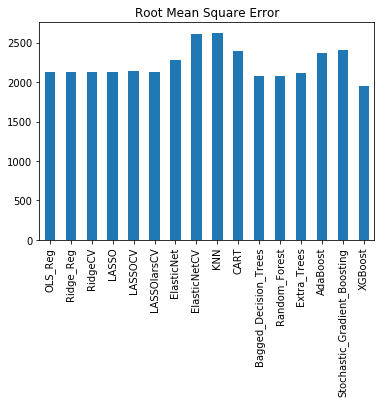

In [91]:
# Plotting RMSE 
rmse_df.plot.bar(legend = False, title = 'Root Mean Square Error')

### 8b)-Computing R^2 

In [92]:
# Creating RMSE Dictionary
r2_dict = {'R^2':[r2_lr, r2_ridge, r2_ridgeCV,r2_lasso,r2_lassoCV,r2_lassolars,
                    r2_ElasticNet,r2_ElasticNetCV,r2_knn,r2_cart,r2_baggdectree,
                    r2_rf,r2_ExTree,r2_ada,r2_Grad,r2_xgb]}

In [93]:
# Creating RMSE DataFrame 
r2_df = pd.DataFrame(data = r2_dict, index = ['OLS_Reg','Ridge_Reg','RidgeCV','LASSO','LASSOCV','LASSOlarsCV',
                                                 'ElasticNet','ElasticNetCV','KNN','CART','Bagged_Decision_Trees',
                                                  'Random_Forest','Extra_Trees','AdaBoost','Stochastic_Gradient_Boosting',
                                                  'XGBoost'])

In [94]:
r2_df

,R^2
OLS_Reg,0.472003
Ridge_Reg,0.472067
RidgeCV,0.472100
LASSO,0.471424
LASSOCV,0.464778
LASSOlarsCV,0.471968
ElasticNet,0.394408
ElasticNetCV,0.205396
KNN,0.199665
CART,0.330794


again XGBoost wins the game

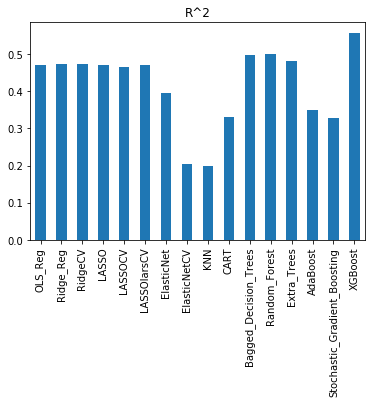

In [119]:
# Plotting RMSE 
r2_df.plot.bar(legend = False, title = 'R^2')

# 9)-Predicting Test Data

In [96]:
df_test.shape

(125546, 131)

In [97]:
X_test.shape

(37664, 130)

In [98]:
df_insurance.shape

(188318, 131)

In [99]:
X_test.head(2)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
150091,0,0,0,0,1,0,0,0,0,0,...,0.281143,0.879507,0.856216,0.28768,0.64296,0.83510,0.784967,0.785706,0.837535,0.708622
8652,0,0,0,1,1,1,0,0,0,0,...,0.725503,0.544630,0.425088,0.67787,0.79047,0.60932,0.592525,0.579845,0.723122,0.802008


In [100]:
df_test.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045


In [101]:
# getting id columns 1st
test_id=df_test['id']

In [102]:
df_test=df_test.drop('id', axis=1)

In [103]:
df_test.shape

(125546, 130)

In [104]:
X_test.shape

(37664, 130)

**For submission, they must be of same columns**

### transform encoding values 

of df_test

In [105]:
catCount = sum(str(x).isalpha() for x in df_test.iloc[1,:])
print("Number of categories: ",catCount)

Number of categories:  116


In [106]:
catFeatureslist = []
for colName,x in df_test.iloc[1,:].iteritems():
    #print(x)
    if(str(x).isalpha()):
        catFeatureslist.append(colName)

In [107]:
# unique values

print(df_test[catFeatureslist].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12       2
cat13       2
cat14       2
cat15       2
cat16       2
cat17       2
cat18       2
cat19       2
cat20       2
cat21       2
cat22       2
cat23       2
cat24       2
cat25       2
cat26       2
cat27       2
cat28       2
cat29       2
cat30       2
         ... 
cat87       4
cat88       4
cat89       8
cat90       6
cat91       8
cat92       8
cat93       5
cat94       7
cat95       5
cat96       9
cat97       7
cat98       5
cat99      17
cat100     15
cat101     17
cat102      7
cat103     14
cat104     17
cat105     18
cat106     18
cat107     20
cat108     11
cat109     74
cat110    123
cat111     16
cat112     51
cat113     60
cat114     18
cat115     23
cat116    311
Length: 116, dtype: int64


In [108]:
df_test.head(3)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232


In [109]:
from sklearn.preprocessing import LabelEncoder

for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(df_test[cf1].unique())
    df_test[cf1] = le.transform(df_test[cf1])

### getting prediction

with XGBoost

In [110]:
# getting prediction for best model with lowest rmse i.e 1951.26
y_pred_best = model_xgb.predict(df_test)

In [111]:
y_pred_best.shape

(125546,)

# 10)-Submission

In [112]:
# this is a sample file and that is how we need to submit.... with "id" & "loss"
df_submit.shape

(125546, 2)

In [113]:
df_submit.head(3)

,id,loss
0,4,0
1,6,0
2,9,0


In [114]:
submission = pd.DataFrame({"id":test_id})
submission = submission.assign(loss = y_pred_best)

In [115]:
"""


submission = pd.DataFrame({
        "id": test_id,
        "loss ": y_pred_best
    })
    
"""

'\n\n\nsubmission = pd.DataFrame({\n        "id": test_id,\n        "loss ": y_pred_best\n    })\n    \n'

In [116]:
submission.shape

(125546, 2)

In [117]:
submission.head(3)

,id,loss
0,4,1778.177002
1,6,2151.745117
2,9,10278.534180


In [118]:
submission.to_csv('submission.csv', index=False)